## Song popularity prediction using KNN

Importing the required packages for the project.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Reading the data into dataframe using pandas

Data from the csv file was read into a dataframe using pandas.

The csv. file containing the data can be downloaded from here:
https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db 

In [2]:
df=pd.read_csv(r'C:\Users\veda.nair\Desktop\Documents\Song popularity prediction using KNN\SpotifyFeatures.csv')
df.head(5)

genre      artist_name                                         track_name  \
0  Opera   Giuseppe Verdi  Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1  Opera  Giacomo Puccini  Madama Butterfly / Act 1: ... E soffitto e pareti   
2  Opera  Giacomo Puccini      Turandot / Act 2: Gloria, gloria, o vincitore   
3  Opera   Giuseppe Verdi       Rigoletto, Act IV: Venti scudi hai tu detto?   
4  Opera   Giuseppe Verdi           Don Carlo / Act 4: "Ella giammai m'amò!"   

                 track_id  popularity  acousticness  danceability  \
0  7EsKYeHtTc4H4xWiTqSVZA          21         0.986         0.313   
1  7MfmRBvqaW0I6UTxXnad8p          18         0.972         0.360   
2  7pBo1GDhIysyUMFXiDVoON          10         0.935         0.168   
3  02mvYZX5aKNzdqEo6jF20m          17         0.961         0.250   
4  03TW0jwGMGhUabAjOpB1T9          19         0.985         0.142   

   duration_ms   energy  instrumentalness key  liveness  loudness   mode  \
0       490867  0.23100          0.000431  C#    0.0964   -14.287  Major   
1       176797  0.20100          0.028000  D#    0.1330   -19.794  Major   
2       266184  0.47000          0.020400   C    0.3630    -8.415  Major   
3       288573  0.00605          0.000000   D    0.1200   -33.440  Major   
4       629760  0.05800          0.146000   D    0.0969   -23.625  Major   

   speechiness    tempo time_signature  valence  
0       0.0547   86.001            4/4   0.0886  
1       0.0581  131.798            4/4   0.3690  
2       0.0383   75.126            3/4   0.0696  
3       0.0480   76.493            4/4   0.0380  
4       0.0493  172.935            4/4   0.0382

An overview of the data was obtained in order to carry out data exploratory analysis

In [3]:
df.describe()

popularity   acousticness   danceability   duration_ms  \
count  228159.000000  228159.000000  228159.000000  2.281590e+05   
mean       44.209130       0.351200       0.554198  2.366092e+05   
std        17.276599       0.351385       0.183949  1.166787e+05   
min         0.000000       0.000001       0.056900  1.550900e+04   
25%        33.000000       0.030900       0.437000  1.862530e+05   
50%        47.000000       0.205000       0.570000  2.211730e+05   
75%        57.000000       0.689000       0.690000  2.648400e+05   
max       100.000000       0.996000       0.987000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  228159.000000     228159.000000  228159.000000  228159.000000   
mean        0.580967          0.137310       0.214638      -9.354658   
std         0.260577          0.292447       0.196977       5.940994   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.405000          0.000000       0.097700     -11.287000   
50%         0.618000          0.000037       0.128000      -7.515000   
75%         0.793000          0.023400       0.263000      -5.415000   
max         0.999000          0.999000       1.000000       1.585000   

         speechiness          tempo        valence  
count  228159.000000  228159.000000  228159.000000  
mean        0.122442     117.423062       0.444795  
std         0.186264      30.712458       0.255397  
min         0.022200      30.379000       0.000000  
25%         0.036800      92.734000       0.232000  
50%         0.050600     115.347000       0.430000  
75%         0.109000     138.887000       0.643000  
max         0.967000     239.848000       1.000000

In [4]:
print(df.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


A link to the definitions of these features is shown here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

## Checking for presence of NaN values in the dataset

The dataset is checked for any null/NaN values. If any are present, they can be filled/dropped.

In [5]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

From the above it is clear that there are no null/NaN values present in the dataset

## Exploratory data analysis

We investigate overall trends in the data to get a good idea of which variables correlate with each other as well as other associations.

Text(0.5, 1.0, 'Popularity Distribution')

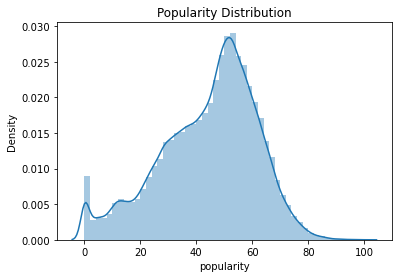

In [6]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')

In [7]:
df.corr()

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.422083      0.294233    -0.041150   
acousticness       -0.422083      1.000000     -0.379441     0.035410   
danceability        0.294233     -0.379441      1.000000    -0.116437   
duration_ms        -0.041150      0.035410     -0.116437     1.000000   
energy              0.277652     -0.723150      0.338110    -0.058045   
instrumentalness   -0.230042      0.323748     -0.360938     0.094618   
liveness           -0.203147      0.086149     -0.034043     0.006760   
loudness            0.413276     -0.698187      0.451336    -0.068716   
speechiness        -0.194673      0.165105      0.135728    -0.017621   
tempo               0.114957     -0.241385      0.018950    -0.027957   
valence             0.119224     -0.335430      0.542405    -0.135970   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.277652         -0.230042 -0.203147  0.413276    -0.194673   
acousticness     -0.723150          0.323748  0.086149 -0.698187     0.165105   
danceability      0.338110         -0.360938 -0.034043  0.451336     0.135728   
duration_ms      -0.058045          0.094618  0.006760 -0.068716    -0.017621   
energy            1.000000         -0.388705  0.182697  0.816640     0.141294   
instrumentalness -0.388705          1.000000 -0.131840 -0.517373    -0.173734   
liveness          0.182697         -0.131840  1.000000  0.035792     0.519542   
loudness          0.816640         -0.517373  0.035792  1.000000    -0.008912   
speechiness       0.141294         -0.173734  0.519542 -0.008912     1.000000   
tempo             0.228067         -0.108424 -0.055556  0.229110    -0.085619   
valence           0.449463         -0.301990  0.018264  0.407057     0.035007   

                     tempo   valence  
popularity        0.114957  0.119224  
acousticness     -0.241385 -0.335430  
danceability      0.018950  0.542405  
duration_ms      -0.027957 -0.135970  
energy            0.228067  0.449463  
instrumentalness -0.108424 -0.301990  
liveness         -0.055556  0.018264  
loudness          0.229110  0.407057  
speechiness      -0.085619  0.035007  
tempo             1.000000  0.120573  
valence           0.120573  1.000000

Text(0.5, 1.0, 'Popularity based on time signature')

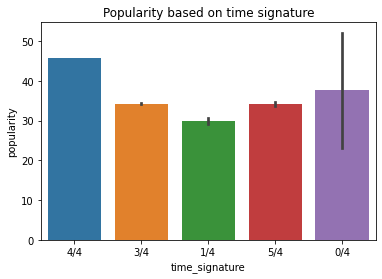

In [8]:
sns.barplot(x='time_signature', y='popularity',data=df)
plt.title('Popularity based on time signature')

Text(0.5, 1.0, 'Popularity based on key')

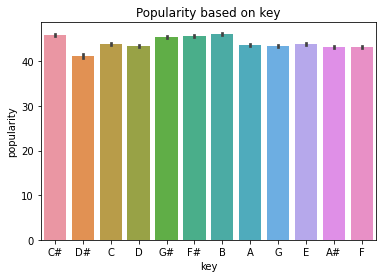

In [9]:
sns.barplot(x='key', y='popularity',data=df)
plt.title('Popularity based on key')

Text(0.5, 1.0, 'Popularity based on mode')

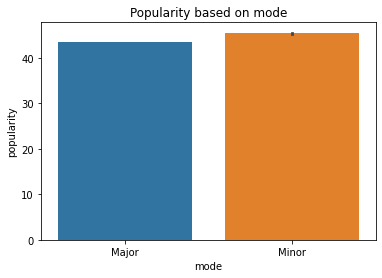

In [10]:
sns.barplot(x='mode', y='popularity',data=df)
plt.title('Popularity based on mode')

Text(0.5, 1.0, 'Popularity based on Mode combined with key')

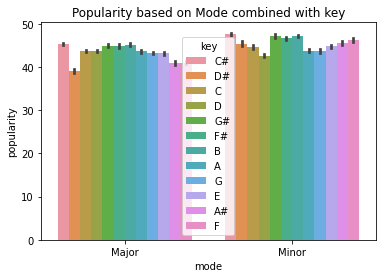

In [11]:
sns.barplot(x='mode',y='popularity',hue='key',data=df)
plt.title('Popularity based on Mode combined with key')

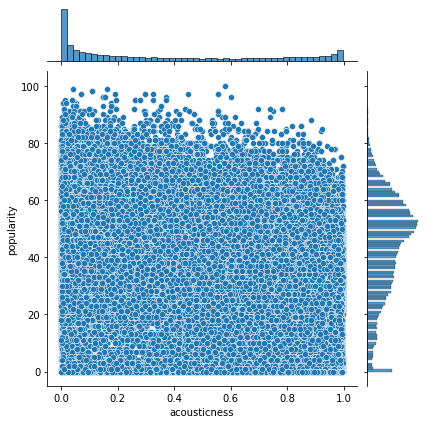

In [12]:
sns.jointplot(x='acousticness',y='popularity',data=df)

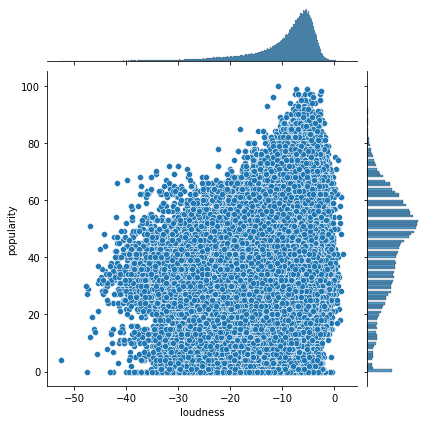

In [13]:
sns.jointplot(x='loudness',y='popularity',data=df)

In [14]:
popular_above_50=df[df.popularity>50]

Text(0.5, 1.0, 'Acousticness of songs above 50 popularity')

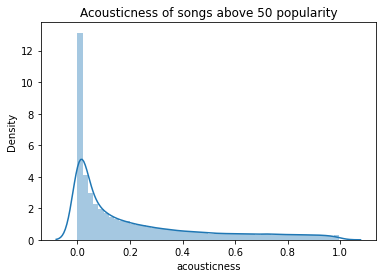

In [15]:
sns.distplot(popular_above_50['acousticness'])
plt.title('Acousticness of songs above 50 popularity')

Text(0.5, 1.0, 'Loudness of songs above 50 popularity')

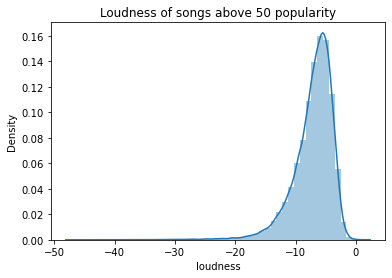

In [16]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness of songs above 50 popularity')

In [18]:
popular_below_50=df[df.popularity<50]

Text(0.5, 1.0, 'Acousticness of songs with popularity below 50')

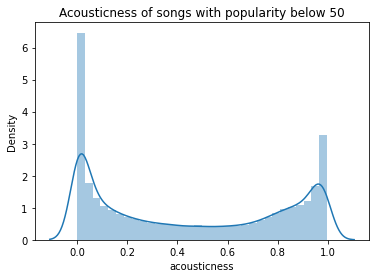

In [19]:
sns.distplot(popular_below_50['acousticness'])
plt.title('Acousticness of songs with popularity below 50')

Text(0.5, 1.0, 'Loudness of songs with popularity below 50')

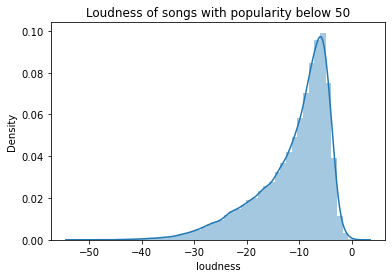

In [20]:
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness of songs with popularity below 50')

From this analysis, the loudness and acousticness features have medium-weak correlations with popularity. 

Furthermore, the distributions of loudness and acousticness differ for songs with more than 50 popularity vs. songs with less than 50 popularity. 

We plot a summary of all relationships between the features.

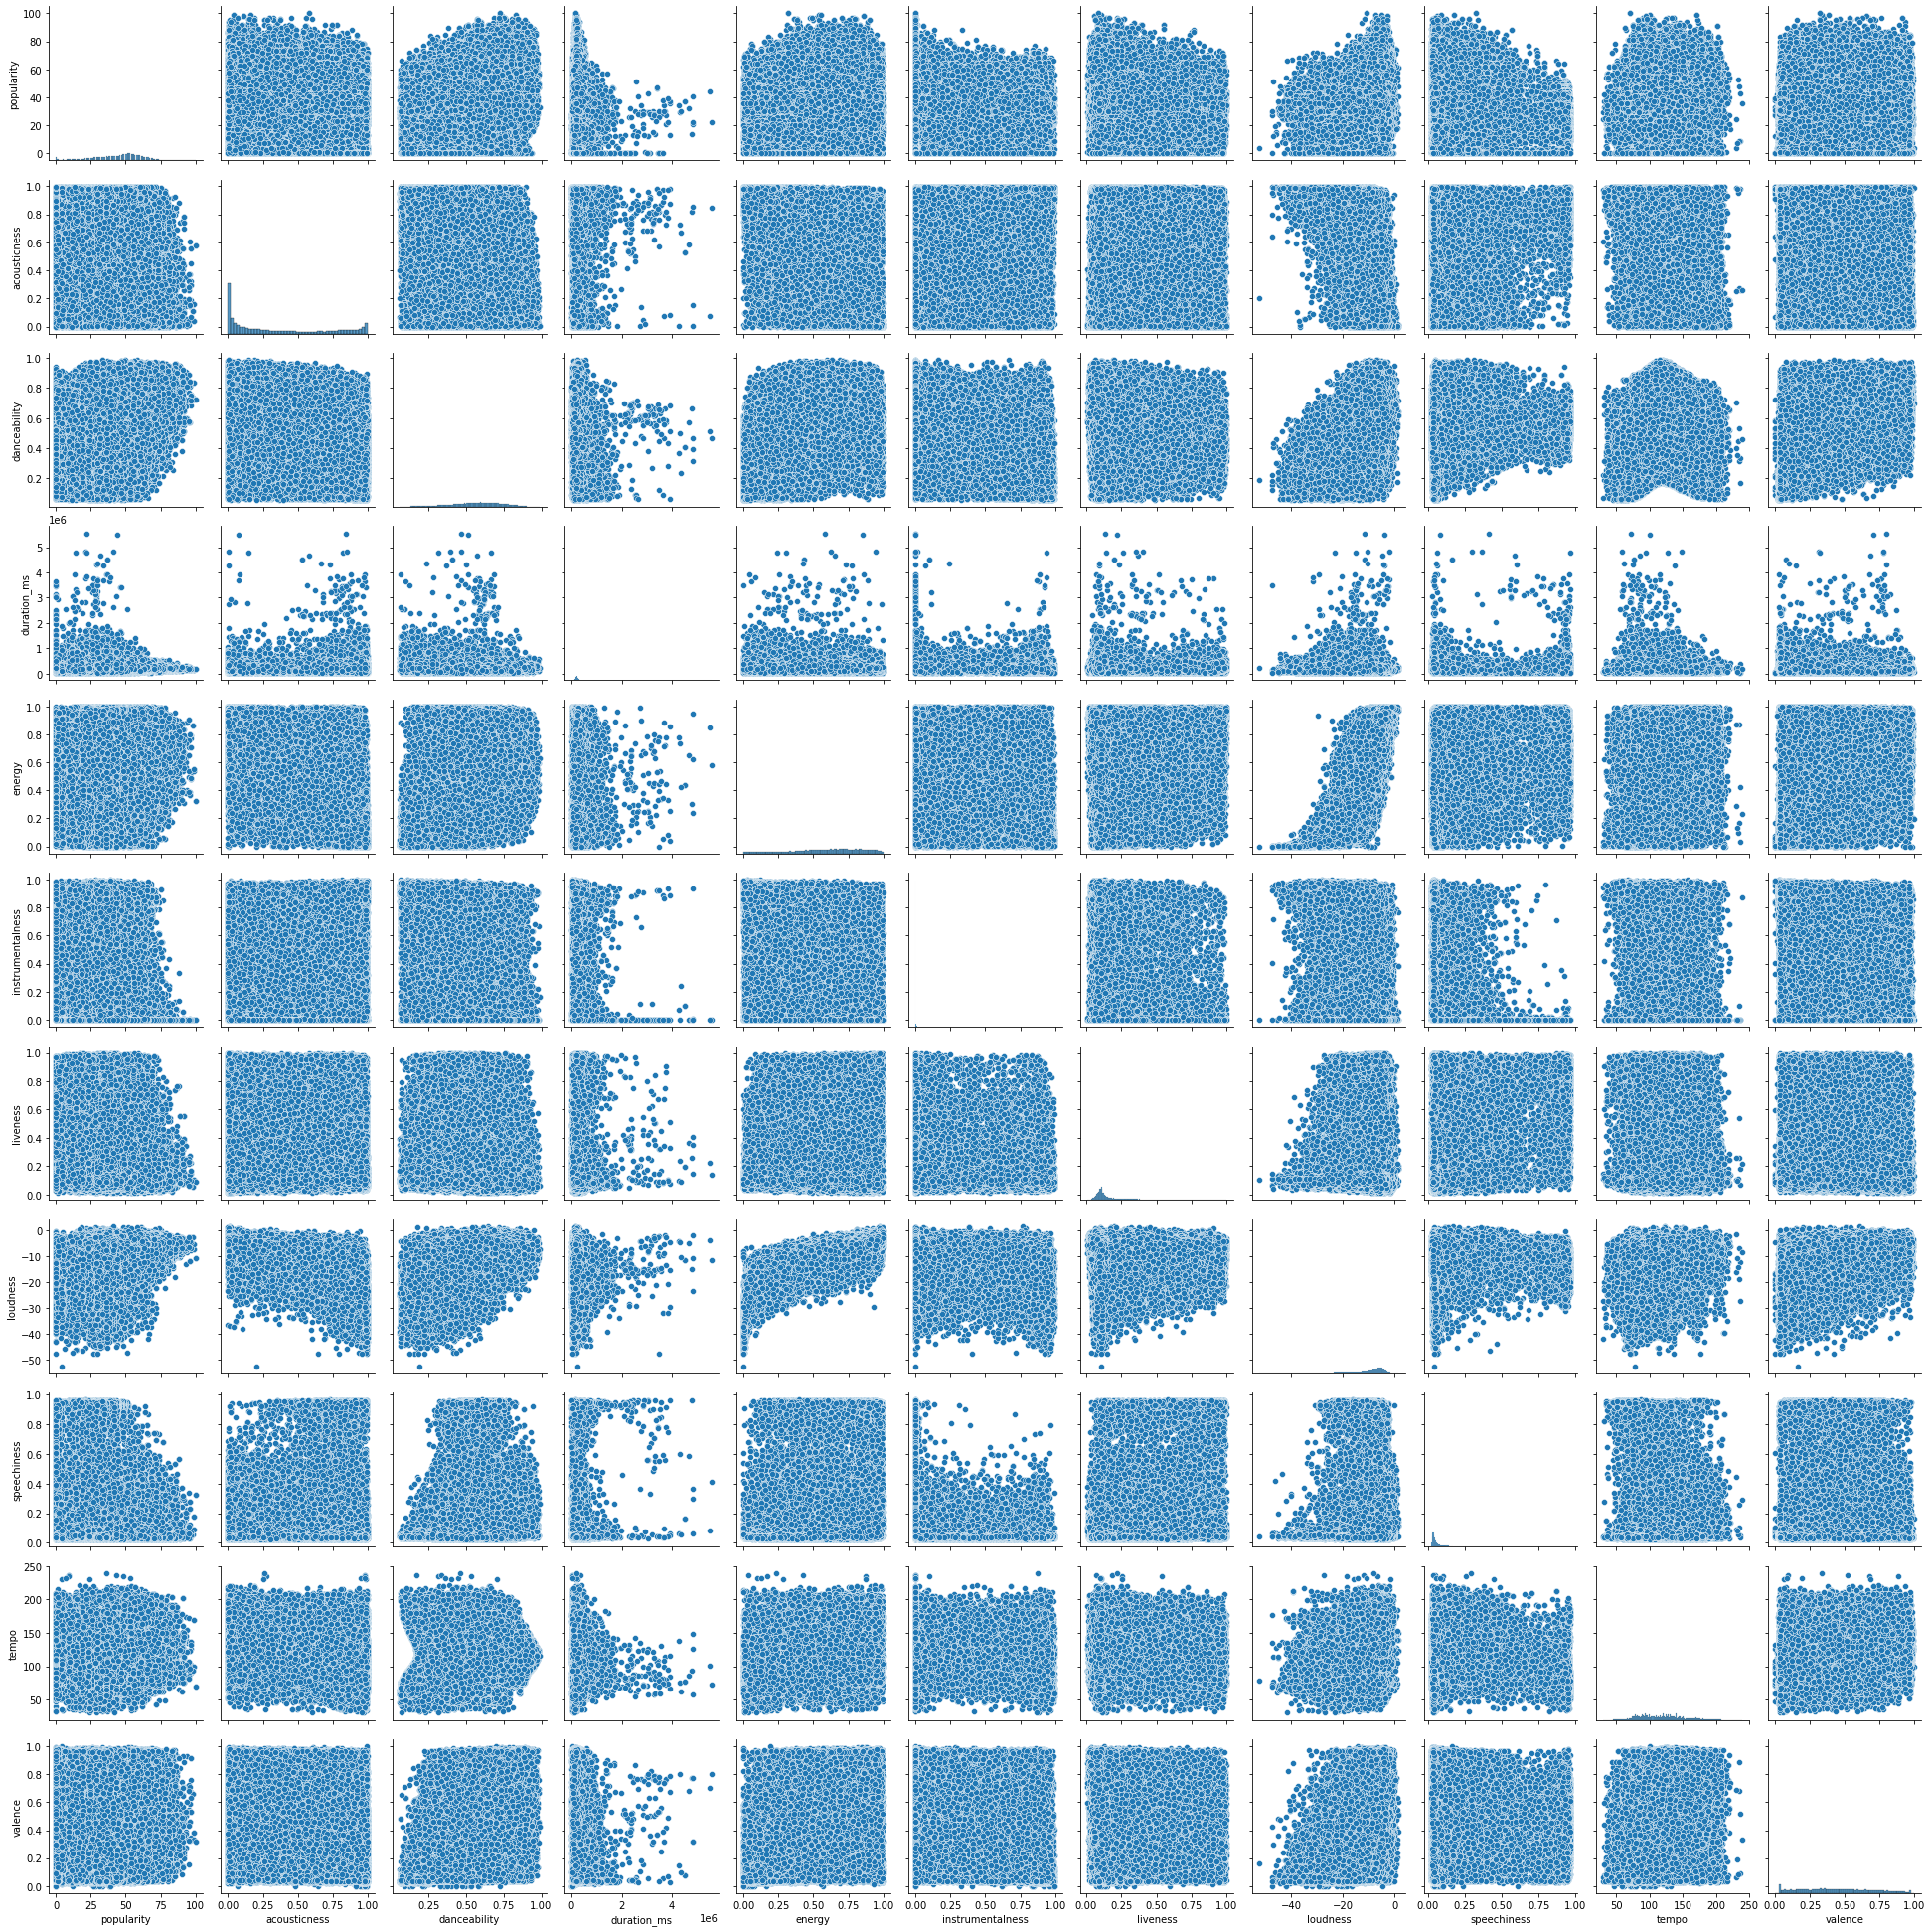

In [21]:
sns.pairplot(df)

## Feature engineering

There are 3 categorical variables (key, mode, and time signature) that need to be converted from text to numbers using one-hot-encoding. 

Key: Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12.

In [22]:
list_keys=df['key'].unique()

for i in range (len(list_keys)):
    df.loc[df['key']==list_keys[i],'key']=i

df.sample(5)

genre        artist_name  \
66501     R&B              OSHUN   
59560   Anime         Nickelback   
11324   Opera  Gaetano Donizetti   
218416   Rock        Iron Maiden   
6572    Dance             MARINA   

                                               track_name  \
66501                                                Burn   
59560                                    Just To Get High   
11324   Lucia di Lammermoor, Act I, Scene I: No. 2b La...   
218416                       Wasting Love - 2015 Remaster   
6572                                     I Am Not a Robot   

                      track_id  popularity  acousticness  danceability  \
66501   3G74znHq1U8CqX67NaWEKk          46      0.087200         0.581   
59560   2MmpHoux5sPwMO3AbNeErR          52      0.000557         0.556   
11324   5JXb5coM8A2h7Kr7TMVyZL           8      0.990000         0.317   
218416  3RFys5QHfFNWbAWqpd48Sb          46      0.005620         0.324   
6572    4Og5nDOUVu3ZrYQP4Ungyg          53      0.570000         0.606   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
66501        201446   0.623          0.000000   6    0.1260    -5.998  Minor   
59560        242080   0.957          0.013100  11    0.0677    -3.640  Major   
11324        124853   0.174          0.084600   2    0.1650   -23.129  Major   
218416       351027   0.667          0.000036   9    0.0873    -5.373  Minor   
6572         214427   0.636          0.000002   3    0.0944    -4.559  Major   

        speechiness    tempo time_signature  valence  
66501        0.2610  129.049            4/4    0.282  
59560        0.0972  142.068            4/4    0.412  
11324        0.0549  113.811            4/4    0.180  
218416       0.0321  142.503            4/4    0.290  
6572         0.0278  120.040            4/4    0.452

Mode: SInce there are 2 modes, Major is assigned as 1 and Minor is assigned as 0.

In [23]:
df.loc[df['mode']=='Major','mode']=1
df.loc[df['mode']=='Minor','mode']=0
df.sample(5)

genre      artist_name  \
179448  Jazz       Birocratic   
71440   Folk       David Gray   
181607  Jazz   Billie Holiday   
78689   Folk      Henry Green   
30643    Pop  Louis The Child   

                                               track_name  \
179448                                         Sleepyface   
71440                                    This Year's Love   
181607  Everything I Have Is Yours - "Billie Holiday" ...   
78689                                           Barcelona   
30643               Slow Down Love (feat. Chelsea Cutler)   

                      track_id  popularity  acousticness  danceability  \
179448  0J1vHScmNyuns9tMlcYvRy          47         0.116         0.617   
71440   1dQOMZz9SkT7ig0w65lQWC          68         0.731         0.330   
181607  0UYDv0HfSVREUhCmGzuNcG          41         0.983         0.461   
78689   0GQoSNObZitW9vxdYhEwcX          47         0.760         0.365   
30643   0z95CqBxQnSQhNnoWTZJKL          66         0.559         0.618   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
179448       195227  0.7480          0.782000   3    0.0707    -8.289    1   
71440        245533  0.1670          0.000031   4    0.1010   -11.635    1   
181607       224533  0.0952          0.000126   3    0.1770   -12.756    0   
78689        191431  0.2690          0.279000   6    0.1110   -15.485    0   
30643        157891  0.5900          0.000034   6    0.2080    -7.751    0   

        speechiness    tempo time_signature  valence  
179448       0.0638   98.016            3/4   0.3520  
71440        0.0311  164.954            3/4   0.2020  
181607       0.0602   75.480            3/4   0.2710  
78689        0.0385  120.387            4/4   0.0386  
30643        0.3590  127.275            4/4   0.2850

We also define popularity as a binary variable. 
For our purposes, we will define above 65 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 65 as "not popular" and encode that as 0.

In [28]:
df['popularity_en']=''

dtype('int64')

In [54]:
df['popularity_en']=np.where(df['popularity']>=65,1,0)

Value counts on the number of popular and unpopular songs.

In [56]:
df['popularity_en'].value_counts()

0    206171
1     21988
Name: popularity_en, dtype: int64

In [57]:
df['popularity_en'].dtype

dtype('int32')

## Finding the features with high correlation to popularity

Here we are trying to find 5 features which have the highest correlation with the popularity of the song.

In [59]:
np.abs(df.corr()['popularity_en']).sort_values().tail(7)

energy              0.083029
acousticness        0.126859
instrumentalness    0.129726
danceability        0.141769
loudness            0.144398
popularity          0.492102
popularity_en       1.000000
Name: popularity_en, dtype: float64

From the above data it is clear that no specific feature has a high correlation with the popularity of the song.

## Train test split and scaling the data

In [76]:
from sklearn.model_selection import train_test_split 

In [77]:
X = df.drop(['popularity','popularity_en','genre', 'artist_name', 'track_name', 'track_id','time_signature'],axis=1)
y = df['popularity_en']

In [78]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [80]:
scaler=StandardScaler()
knn = KNeighborsClassifier()

In [81]:
operations = [('scaler',scaler),('knn',knn)]

## Elbow Method for Choosing Reasonable K Values

Here we are creating a pipeline in order to automate finding the optimal K value using the elbow method.

NOTE: This uses the test set for the hyperparameter selection of K.

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
pipe = Pipeline(operations)

In [85]:
from sklearn.model_selection import GridSearchCV

In [97]:
k_values = list(range(1,10))

In [98]:
param_grid = {'knn__n_neighbors': k_values}

In [99]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [100]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [101]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [102]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.9502978 , 0.9376458 , 0.91956873, 0.91816133, 0.9085725 ,
       0.91122172, 0.90430647, 0.9046084 , 0.90043976])

Text(0, 0.5, 'Accuracy')

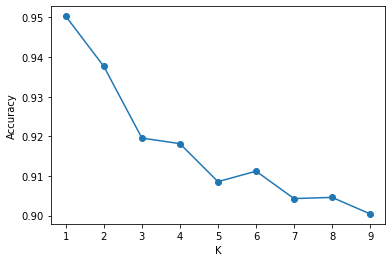

In [103]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [104]:
pred = full_cv_classifier.predict(X_test)

In [105]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [106]:
confusion_matrix(y_test,pred)

array([[19950,   608],
       [  261,  1997]], dtype=int64)

In [107]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     20558
           1       0.77      0.88      0.82      2258

    accuracy                           0.96     22816
   macro avg       0.88      0.93      0.90     22816
weighted avg       0.97      0.96      0.96     22816



From the above classification report it is clear that the precision for predicting the song as popular is 77%. This is because a very small subset of the entire data contained popular songs. Since the recall value of the data is 88% the model is reliable. 

The overall accuracy of the model is 96% which appears to be reliable. But since the dataset is highly skewed this might not hold true for a more evenly divided dataset.

## Final model

Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

This time we will use 3 neighbours as suggested by the elbow method.

In [109]:
scaler = StandardScaler()
knn03 = KNeighborsClassifier(n_neighbors=3)
operations = [('scaler',scaler),('knn03',knn03)]

In [110]:
pipe = Pipeline(operations)

In [112]:
pipe.fit(X_cv,y_cv)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn03', KNeighborsClassifier(n_neighbors=3))])

In [113]:
pipe_pred = pipe.predict(X_test)

In [114]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     20558
           1       0.63      0.66      0.65      2258

    accuracy                           0.93     22816
   macro avg       0.80      0.81      0.80     22816
weighted avg       0.93      0.93      0.93     22816



In [115]:
confusion_matrix(y_test,pred)

array([[19950,   608],
       [  261,  1997]], dtype=int64)